# Lecture 1 - Programming Assignment

## Data Set

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
seoul_bike_sharing_demand = fetch_ucirepo(id=560) 
  
# data (as pandas dataframes) 
X = seoul_bike_sharing_demand.data.features 
y = seoul_bike_sharing_demand.data.targets 
  
# metadata 
print(seoul_bike_sharing_demand.metadata) 
  
# variable information 
# print(seoul_bike_sharing_demand.variables) 


{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

In [20]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

### Dataset summary

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

In [13]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/static/public/560/data.csv", delimiter =',')

df.head()

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  1/12/2017                254     0         -5.2        37         2.2   
1  1/12/2017                204     1         -5.5        38         0.8   
2  1/12/2017                173     2         -6.0        39         1.0   
3  1/12/2017                107     3         -6.2        40         0.9   
4  1/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning Day  
0  Winter  No Holiday             Yes  
1  Winter  No Holiday             Yes  
2  Winter  No Holiday             Yes  
3  Winter  No Holiday             Yes  
4  Winter  No Holiday             Yes

## 1. Create Correlation Plot

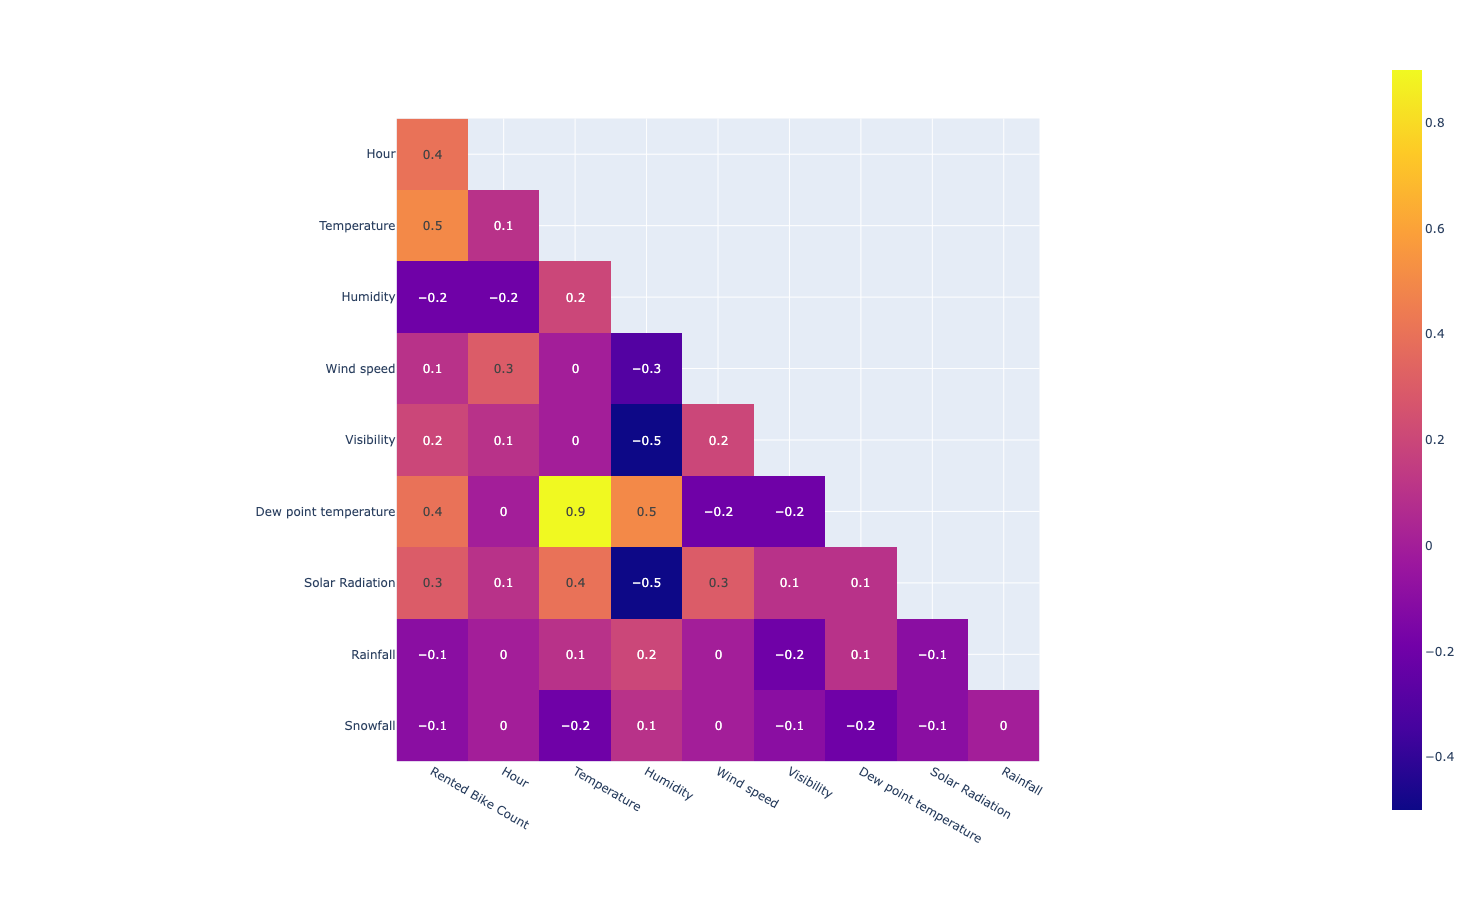

In [12]:
import plotly.express as px
import numpy as np

# disregard non-numeric columns, select numeric types
numeric_df = df.select_dtypes(include=[np.number]) 

# Correlation
df_corr = numeric_df.corr().round(1)  

# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Apply the mask to the correlation matrix and then drop rows and columns with all NaN values
df_corr_viz = df_corr.mask(mask)
df_corr_viz = df_corr_viz.dropna(axis=0, how='all') 
df_corr_viz = df_corr_viz.dropna(axis=1, how='all')  

# Heat Map
fig = px.imshow(df_corr_viz, text_auto=True)
fig.update_layout(height=900, width=900)
fig.show()

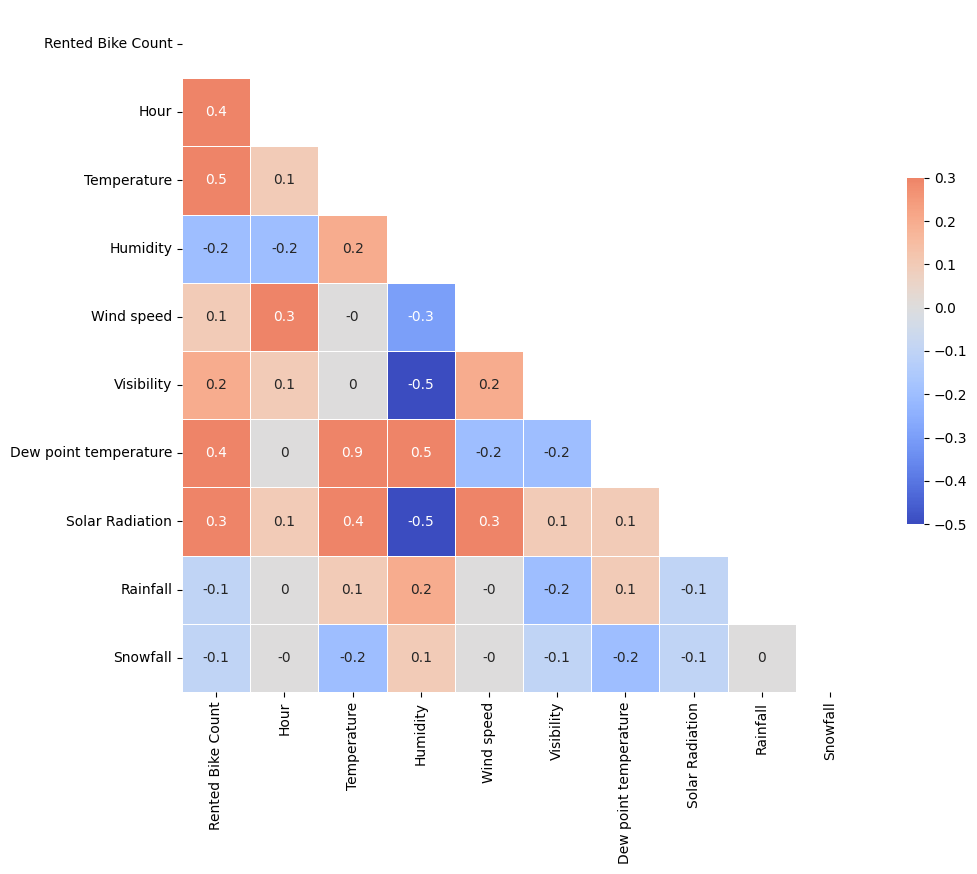

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Import necessary libraries
import pandas as pd
import numpy as np

# Selecting numeric types
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr = numeric_df.corr().round(1)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns_heatmap = sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmax=.3, center=0,
                          square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()


### Observation

Dew point temperature and temperature are highly correlated but I do not want to focus on this columns, Generally, the higher the dew point, the more moisture there is in the air. As temperature increases, the air can hold more moisture, which often raises the dew point.

## FOCUS ON Rented Bike and Temperature. How does temperature affect rented bike counts

### 2. Check the distribution of each column and determine which probability distribution it fits

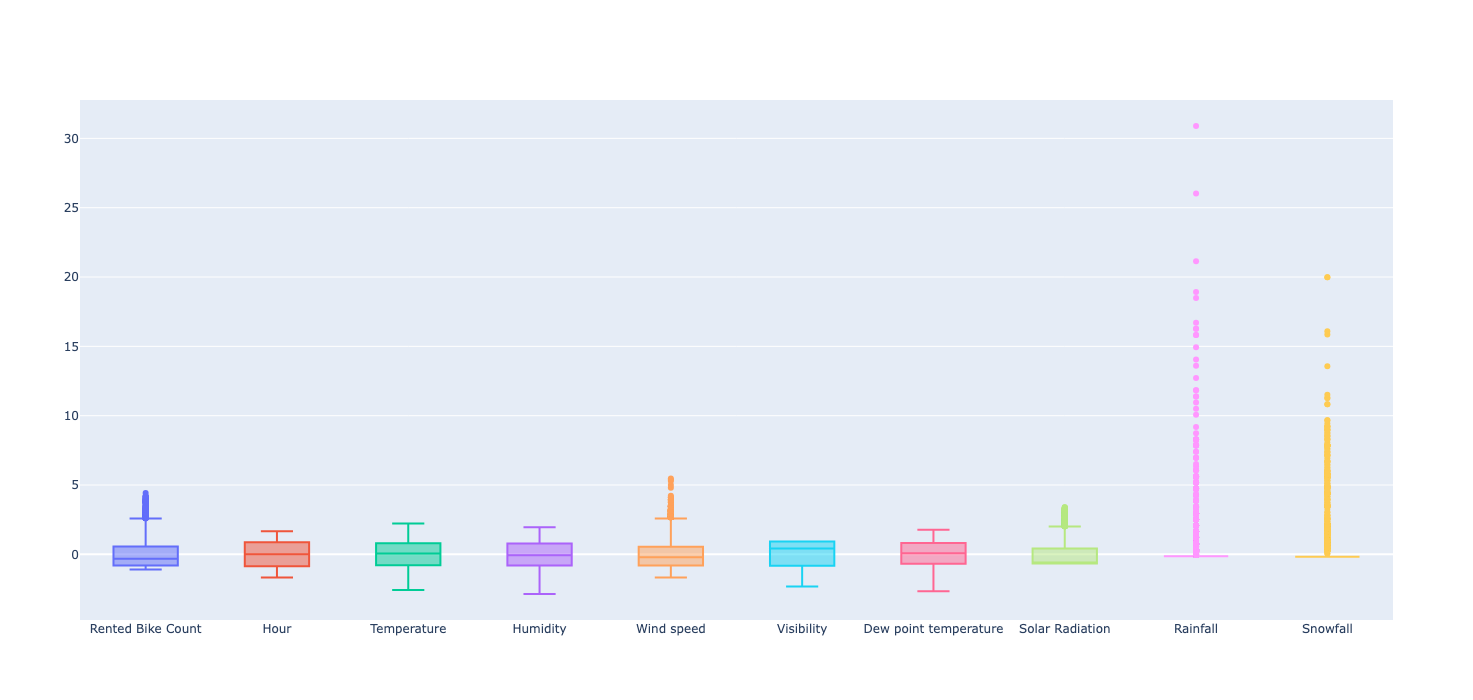

In [15]:
import plotly.graph_objects as go

standard = (numeric_df-numeric_df.mean())/numeric_df.std()

# Create a box plot
fig = go.Figure()
for i in standard.columns:
    fig.add_trace(go.Box(y=standard[str(i)], name=str(i)))
fig.update_layout(showlegend=False,height = 700, width=800)
fig.show()

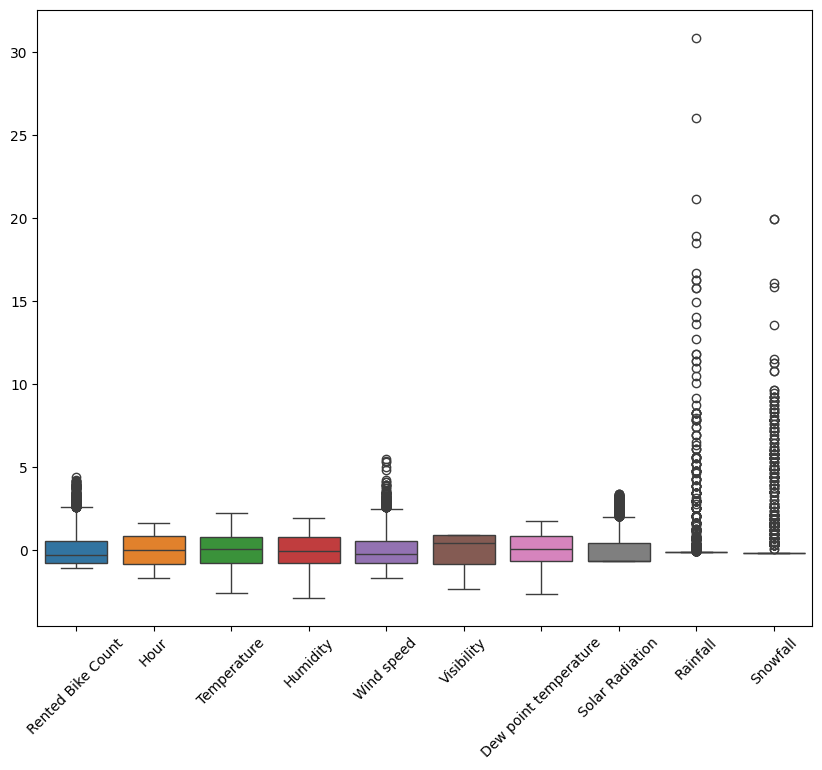

In [21]:
# Assuming 'numeric_df' is your DataFrame with numerical data
# Standardize the DataFrame
standard = (numeric_df - numeric_df.mean()) / numeric_df.std()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a box plot
sns_boxplot = sns.boxplot(data=standard)
sns_boxplot.set_xticklabels(sns_boxplot.get_xticklabels(), rotation=45)  # Rotate x labels for better visibility

plt.show()

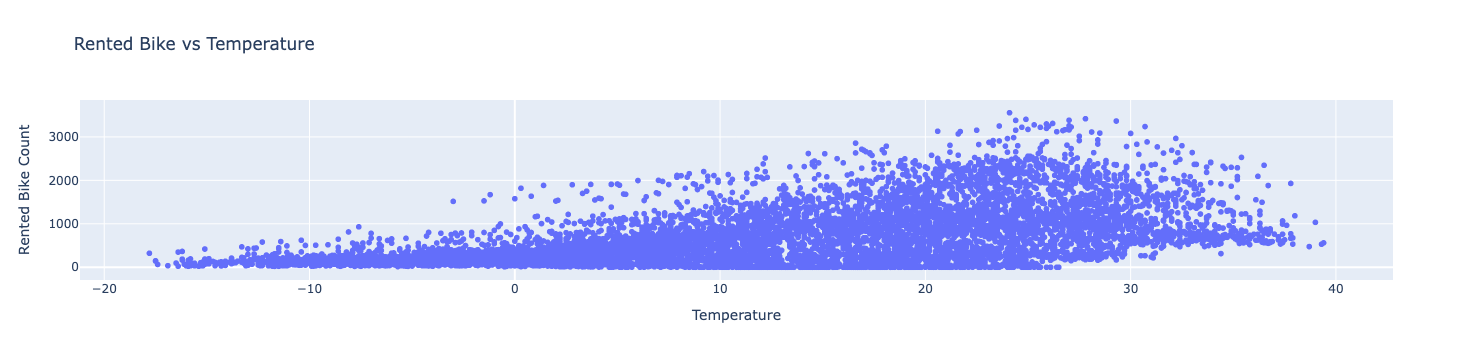

In [17]:
fig = px.scatter(df, x="Temperature", y="Rented Bike Count", title="Rented Bike vs Temperature")
fig.show()

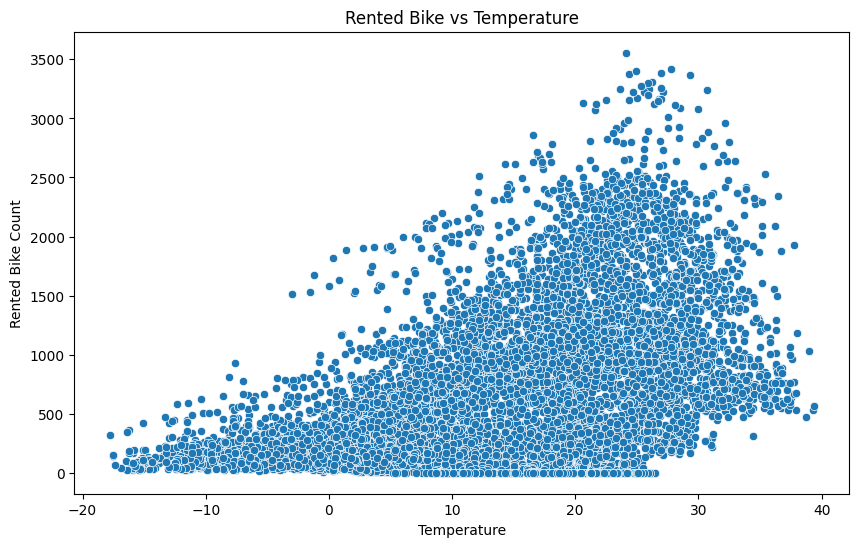

In [18]:
# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Rented Bike Count')

plt.title('Rented Bike vs Temperature')  # Set the title of the plot
plt.xlabel('Temperature')  # Label for the x-axis
plt.ylabel('Rented Bike Count')  # Label for the y-axis
plt.show()

## 3. Summary Statistics

In [26]:
numeric_df.describe()

Rented Bike Count         Hour  Temperature     Humidity   Wind speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew point temperature  Solar Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall  
count  8760.000000  
mean      0.075068  
std       0.436746  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       8.800000

## Temperature Gaussian 

In [28]:
mean_temperature = numeric_df["Temperature"].mean()
std_temperature = numeric_df["Temperature"].std()

print(mean_temperature)
print(std_temperature)

12.882922374429223
11.944825230027947


In [29]:
# Generate points on the x axis between the minimum and maximum observed temperatures
x_values = np.linspace(numeric_df["Temperature"].min(),numeric_df["Temperature"].max(), 400)
# Calculate the probability density function (PDF) for the Gaussian distribution
y_values = (1 / (np.sqrt(2 * np.pi * std_temperature**2))) * np.exp(-0.5 * ((x_values - mean_temperature) / std_temperature)**2)

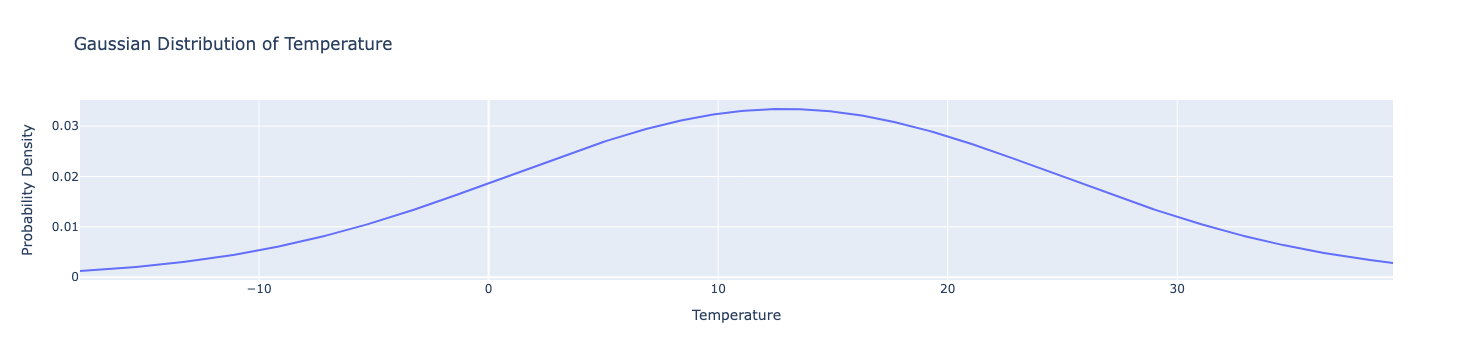

In [30]:
fig = go.Figure()

# Add the Gaussian distribution curve to the figure
fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines', name='Gaussian Fit'))

# Add titles and labels
fig.update_layout(
    title="Gaussian Distribution of Temperature",
    xaxis_title="Temperature",
    yaxis_title="Probability Density"
)

# Show the plot
fig.show()

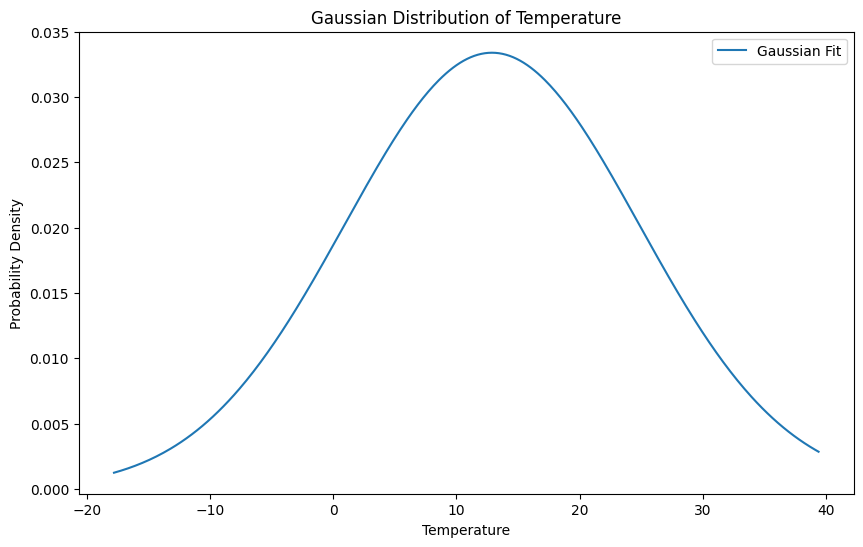

In [31]:
# Assuming x_values and y_values are already defined and contain the data for the Gaussian distribution
# x_values = your_x_values
# y_values = your_y_values

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Gaussian Fit')  # Plot the Gaussian curve

# Add titles and labels
plt.title("Gaussian Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Probability Density")

plt.legend()  # Show legend
plt.show()  # Display the plot

## Rented Bike Count Negative Binomial Distribution

In [32]:
from scipy.stats import nbinom

mean_rent_bike_count = numeric_df["Rented Bike Count"].mean()
var_rent_bike_count  = numeric_df["Rented Bike Count"].var()

print(mean_rent_bike_count)
print(var_rent_bike_count)

704.6020547945205
416021.7333900004


In [33]:
# Estimate r (using a simplifying assumption that r = mean^2 / (variance - mean))
r = mean_rent_bike_count**2 / (var_rent_bike_count - mean_rent_bike_count) if var_rent_bike_count > mean_rent_bike_count else mean_rent_bike_count

# Estimate p
p = r / (r + mean_rent_bike_count)

print(r)
print(p)

1.1953854492459168
0.001693666455963708


In [35]:
# Generate an array of possible count values
count_values = np.arange(numeric_df["Rented Bike Count"].min(), numeric_df["Rented Bike Count"].max() + 10)

# Calculate the PMF for these count values
pmf_values = nbinom.pmf(count_values, r, p)

pmf_values

array([4.86834310e-04, 5.80969013e-04, 6.36645365e-04, ...,
       6.23554494e-06, 6.22532528e-06, 6.21512226e-06])

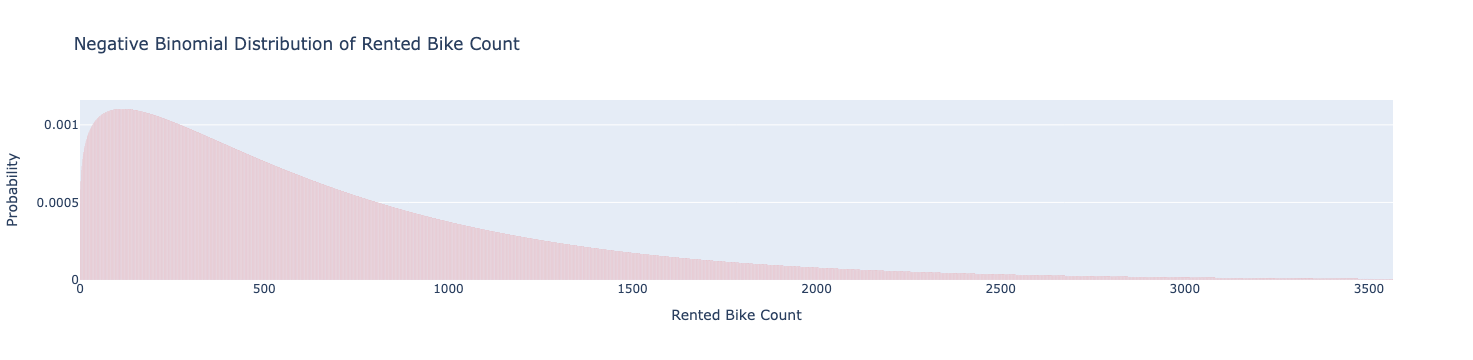

In [36]:
fig = go.Figure()

# Add the Negative Binomial PMF to the figure as bars
fig.add_trace(go.Bar(x=count_values, y=pmf_values, name='Negative Binomial PMF', marker_color='red'))

fig.update_layout(
    title="Negative Binomial Distribution of Rented Bike Count",
    xaxis_title="Rented Bike Count",
    yaxis_title="Probability",
)

fig.show()

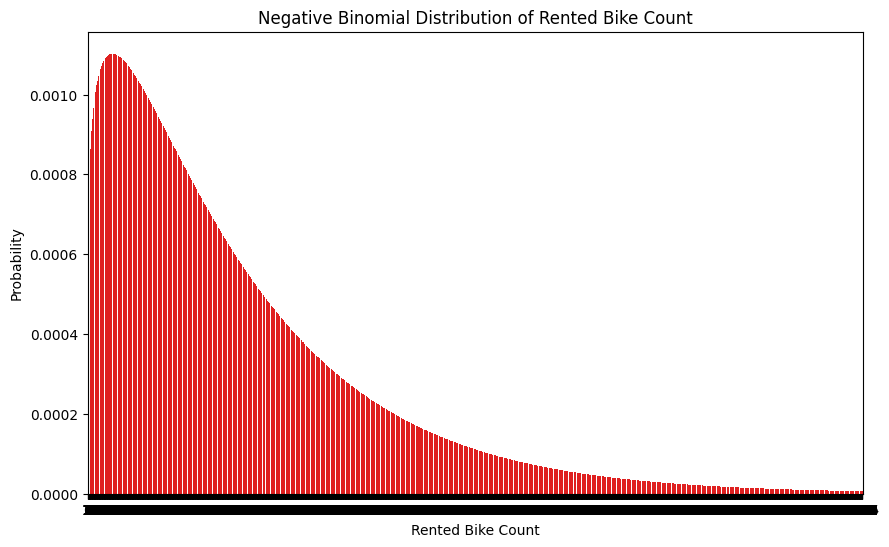

In [38]:
data = pd.DataFrame({'Rented Bike Count': count_values, 'Probability': pmf_values})

plt.figure(figsize=(10, 6))
sns.barplot(x='Rented Bike Count', y='Probability', data=data, color='red')

# Add titles and labels
plt.title("Negative Binomial Distribution of Rented Bike Count")
plt.xlabel("Rented Bike Count")
plt.ylabel("Probability")

plt.show()

### 4. Perform a hypothesis test (Code from scratch)

H0: The distribution of observed counts of rented bikes fits a negative binomial distribution \
Ha: The distribution of observed counts of rented bikes does not fit a negative binomial distribution.

significance level = 0.05

### Using scipy to calculate chisquare

In [105]:
from scipy.stats import chisquare, chi2

# Convert PMF to expected frequencies
expected_frequencies = pmf_values * N

# Normalize expected frequencies to match the total number of observations
total_expected = expected_frequencies.sum()
adjusted_expected_frequencies = expected_frequencies * (N / total_expected)

# Observed frequencies: creating a frequency distribution of observed counts
observed_frequencies = np.bincount(correlated_columns["Rented Bike Count"].values)
observed_frequencies = observed_frequencies[correlated_columns["Rented Bike Count"].min():correlated_columns["Rented Bike Count"].max() + 10]

# Ensure the lengths of observed and expected frequencies match
if len(observed_frequencies) < len(adjusted_expected_frequencies):
    observed_frequencies = np.append(observed_frequencies, [0]*(len(adjusted_expected_frequencies) - len(observed_frequencies)))

# Group small expected frequencies if necessary
for i in range(len(adjusted_expected_frequencies)):
    if adjusted_expected_frequencies[i] < 5:
        if i > 0:  # Combine with previous if not the first index
            adjusted_expected_frequencies[i - 1] += adjusted_expected_frequencies[i]
            observed_frequencies[i - 1] += observed_frequencies[i]
            adjusted_expected_frequencies[i] = 0
            observed_frequencies[i] = 0

# Filter out zero entries for the chi-square test if any grouping was done
non_zero_indices = adjusted_expected_frequencies > 0
filtered_observed = observed_frequencies[non_zero_indices]
filtered_expected = adjusted_expected_frequencies[non_zero_indices]

degrees_of_freedom = len(filtered_expected) - 1

# Re-run chi-square test
chi_stat, p_value = chisquare(f_obs=filtered_observed, f_exp=filtered_expected)
print("Adjusted Chi-square Statistic:", chi_stat)

Adjusted Chi-square Statistic: 23627.15201084406


### Manual Coding for Chi square statistics

In [108]:
import mpmath as mp
# Calculate Chi-square statistic manually
chi_squared_stat = np.sum((filtered_observed - filtered_expected) ** 2 / filtered_expected)
degrees_of_freedom = len(filtered_expected) - 1

p_value = mp.gammainc(degrees_of_freedom / 2, a=chi_squared_stat / 2, regularized=True)

# Without SciPy, you cannot directly compute the p-value without a chi-square distribution table or additional libraries.
print("Chi-square Statistic:", chi_squared_stat)
print("P-value:", float(p_value))

Chi-square Statistic: 23627.15201084406
P-value: 0.0


In [112]:
print(f"Degrees of Freedom: {df}")
alpha = 0.05  # Common choice for many tests

# Calculate the critical value from the chi-square distribution
critical_value = chi2.ppf(1 - alpha, df)

print(f"Critical Value for chi-squared test at alpha = {alpha} with {df} degrees of freedom: {critical_value}")

Degrees of Freedom: 3562
Critical Value for chi-squared test at alpha = 0.05 with 3562 degrees of freedom: 3701.959578307844


### Interpreting Results

The null hypthosis is reject since the chi-squard value is 23627.15 while the critical value is 3701.95 which is far off the ciritical value. A P-value of zero was also result which further indicates to reject the null hypothesis, thus the distribution of observed counts of rented bikes does not fit a negative binomial distribution.